## 

# Proyecto Final


> *Maria Conchita Vasquez*  
> *Carnet 20062228 seccion V*
* * *
## 1. Crear un entorno de anaconda con los paquetes que considere necesarios

In [75]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns
from scipy.stats import norm


## 2. Usando sclicing con NumPy separar los datos en 2 datasets: entrenamiento(80 %) y validacion y pruebas(20 %).


In [76]:
data = np.load("proyecto_training_data.npy")

particion = (len(data)*80)//100

prueba =pd.DataFrame(data[0:particion],columns=['SalePrice','OverallQual','1stFlrSF','TotRmsAbvGrd','YearBuilt','LotFrontage'])
control =pd.DataFrame(data[particion:len(data)],columns=['SalePrice','OverallQual','1stFlrSF','TotRmsAbvGrd','YearBuilt','LotFrontage'])

#m=pd.DataFrame(np.nanmean(prueba,axis=0),columns=['SalePrice','OverallQual','1stFlrSF','TotRmsAbvGrd','YearBuilt','LotFrontage'])

## 3. Analisis exploratorio de datos: Para cada variable en el dataset calcular((usando numpy opandas):
    * media
    * valor maximo
    * valor minimo
    * rango(peak to peak, no el rango del tensor que por ser vector sabemos que es 1)
    * desviacion estandar.

In [77]:
media = np.nanmean(prueba, axis=0)

maximo = np.nanmax(prueba, axis=0)

minimo = np.nanmin(prueba, axis=0)

rango= maximo - minimo

desvest = np.nanstd(prueba, axis=0)

print(media)
print(maximo)
print(rango)
print(desvest)

[1.80590277e+05 6.10102740e+00 1.15632363e+03 6.48544521e+00
 1.97145120e+03 6.99469854e+01]
[7.550e+05 1.000e+01 3.228e+03 1.400e+01 2.010e+03 3.130e+02]
[7.201e+05 9.000e+00 2.894e+03 1.200e+01 1.350e+02 2.920e+02]
[7.87819511e+04 1.37743519e+00 3.73620332e+02 1.60845172e+00
 2.99388821e+01 2.34659548e+01]


## 4. Para cada variable en el dataset usar seaborn(funcion distplot https://seaborn.pydata.org/generated/seaborn.distplot.html) para graficar un histograma de la variable

C:\Users\50255\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\50255\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\50255\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-lev

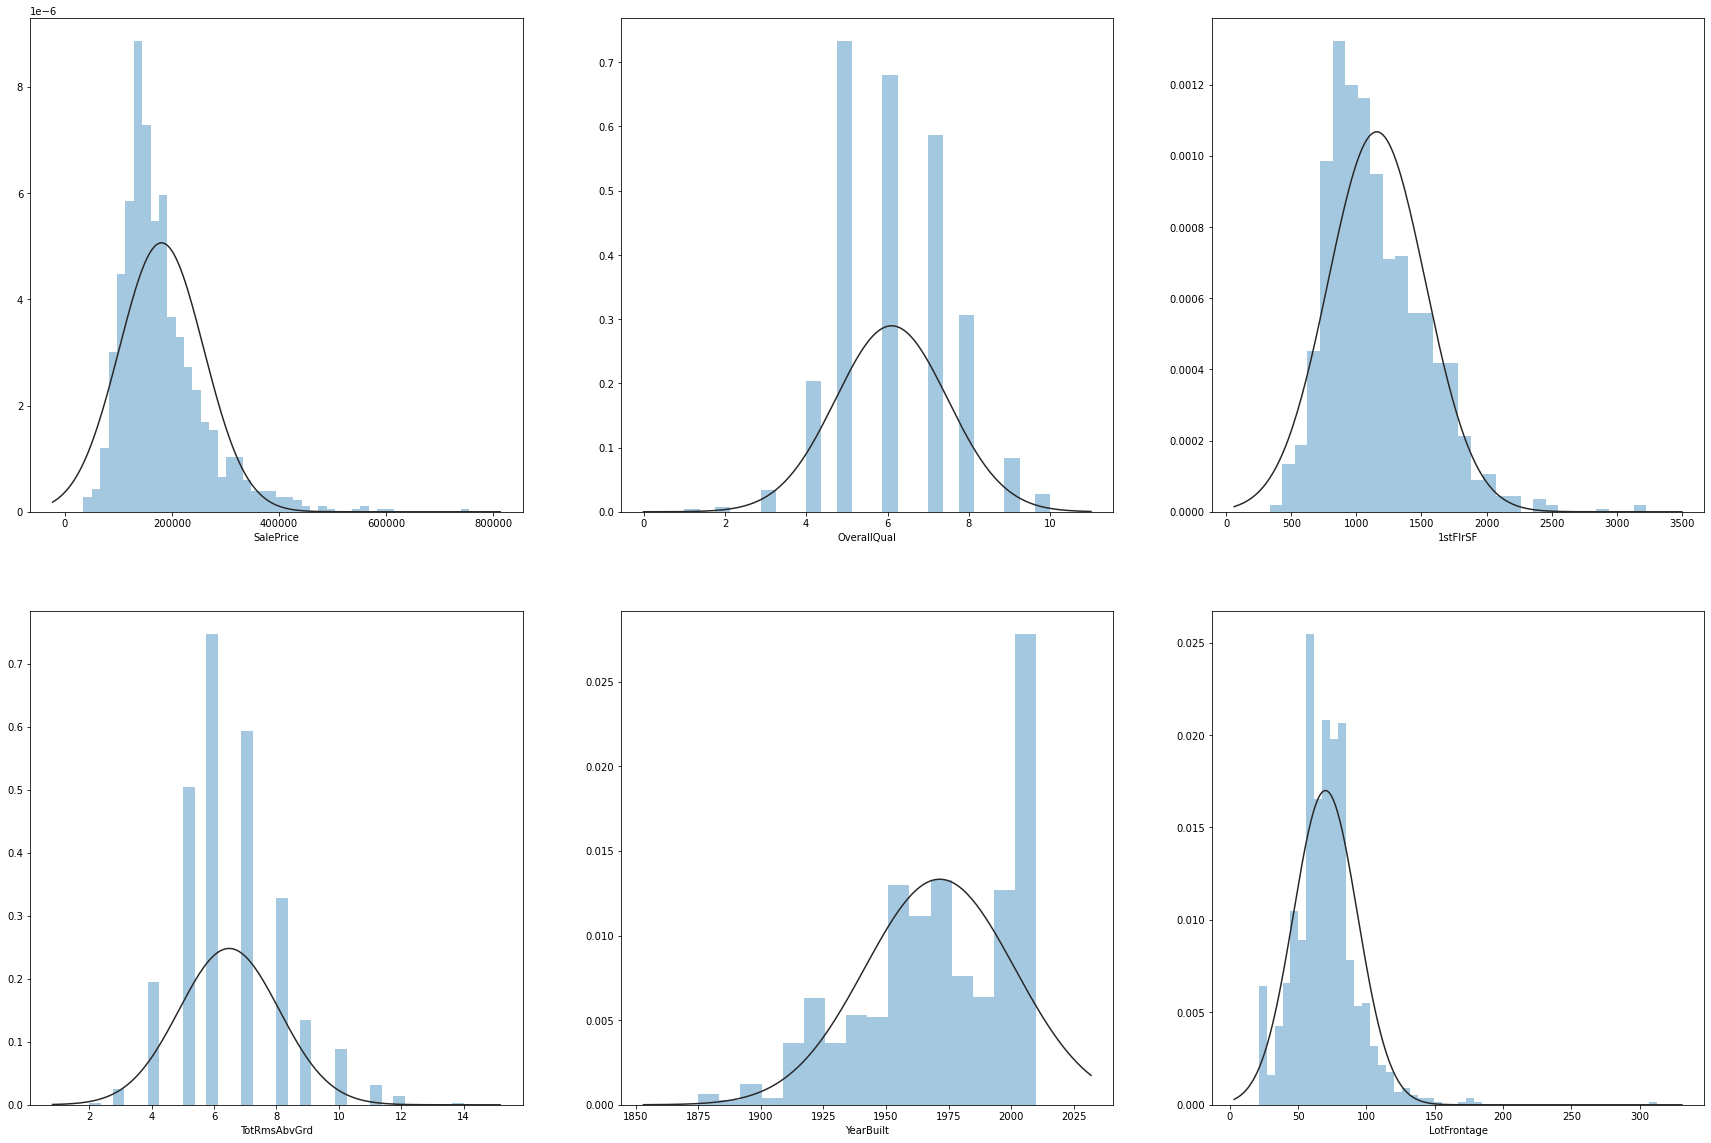

In [151]:
#  ['SalePrice','OverallQual','1stFlrSF','TotRmsAbvGrd','YearBuilt','LotFrontage']
#plt.figure(figsize=(30,16))
fig, ax=plt.subplots(figsize=(30,20),nrows=2,ncols=3)
sns.distplot(prueba['SalePrice'], fit=norm, kde=False, ax=ax[0,0])
sns.distplot(prueba['OverallQual'], fit=norm, kde=False, ax=ax[0,1])
sns.distplot(prueba['1stFlrSF'], fit=norm, kde=False, ax=ax[0,2])
sns.distplot(prueba['TotRmsAbvGrd'], fit=norm, kde=False, ax=ax[1,0])
sns.distplot(prueba['YearBuilt'], fit=norm, kde=False, ax=ax[1,1])
sns.distplot(prueba['LotFrontage'], fit=norm, kde=False, ax=ax[1,2])

plt.show()

## 5. Para cada variable independiente x : 
* Calcular el coeficiente de correlacion entre x y y. 
* Graficar x vs y(scatterplot) usando matplotlib.
* Colocar el coeficiente de correlacion y colocarlo como parte del tıtulo de la grafica.
* Basado en la grafica y el coeficiente de correlacion de cada par x,y elegir las 2 variables con mas potencial predictivo es decir las 2 variables que presentan mayor correlacion entre dicha variable y la variable dependiente.


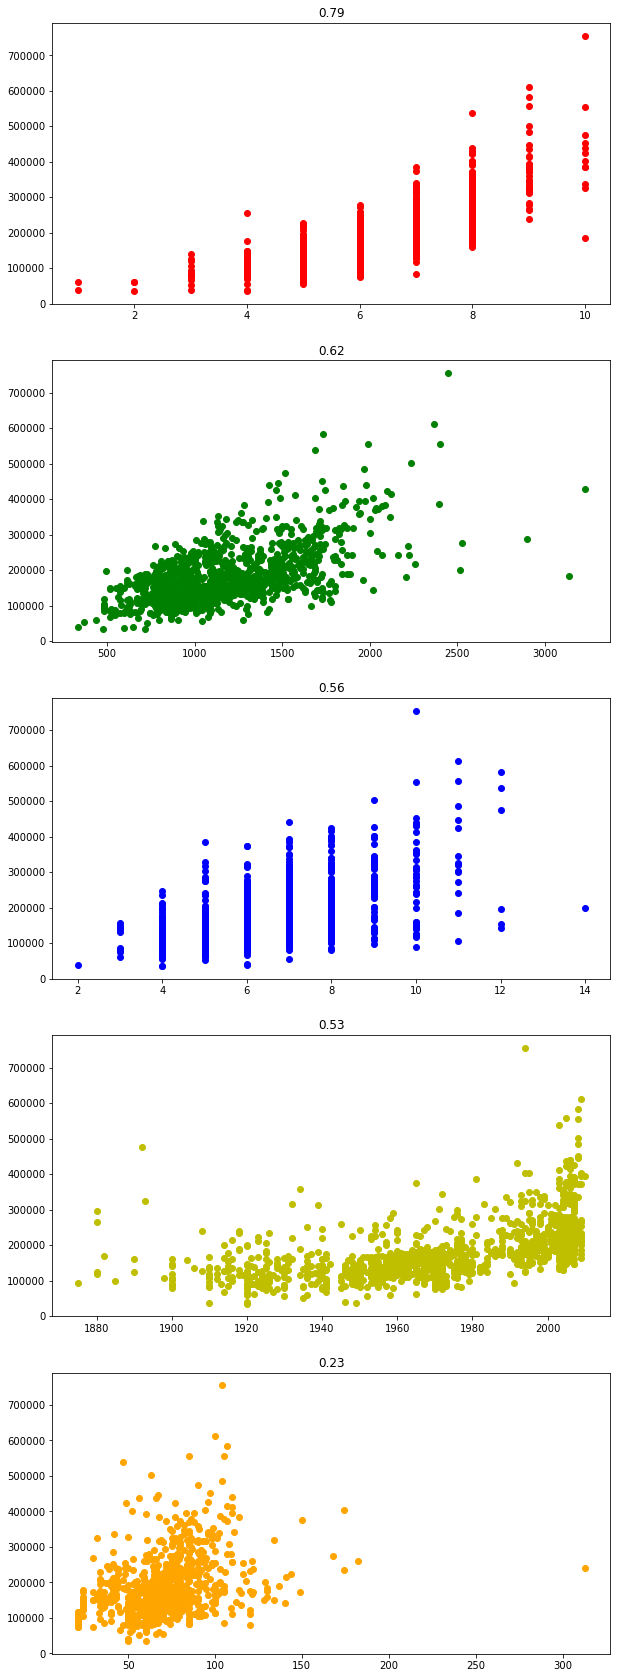

In [169]:
# OverallQual vrs SalePrice
plt.figure(figsize=(10,30))
plt.subplot(5,1,1)
plt.scatter(prueba['OverallQual'],prueba['SalePrice'], color='r')
plt.title((np.round(np.corrcoef(prueba['SalePrice'],prueba['OverallQual']),2)[1][0]))
# 1stFlrSF vrs SalePrice
plt.subplot(5,1,2)
plt.title((np.round(np.corrcoef(prueba['1stFlrSF'],prueba['SalePrice']),2)[1][0]))
plt.scatter(prueba['1stFlrSF'],prueba['SalePrice'], color='g')
# TotRmsAbvGrd vrs SalePrice
plt.subplot(5,1,3)
plt.title((np.round(np.corrcoef(prueba['TotRmsAbvGrd'],prueba['SalePrice']),2)[1][0]))
plt.scatter(prueba['TotRmsAbvGrd'],prueba['SalePrice'], color='b')
# YearBuilt vrs SalePrice
plt.subplot(5,1,4)
plt.title((np.round(np.corrcoef(prueba['YearBuilt'],prueba['SalePrice']),2)[1][0]))
plt.scatter(prueba['YearBuilt'],prueba['SalePrice'], color='y')
# LotFrontage vrs SalePrice
plt.subplot(5,1,5)
plt.title((np.round(np.corrcoef(np.nan_to_num(prueba['LotFrontage']),prueba['SalePrice']),2)[1][0]))
plt.scatter(prueba['LotFrontage'],prueba['SalePrice'], color='orange')
plt.show()

0.79
0.62


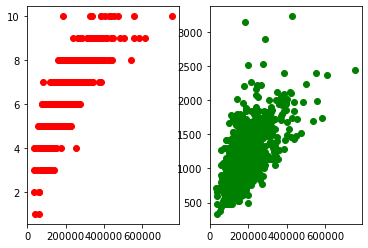

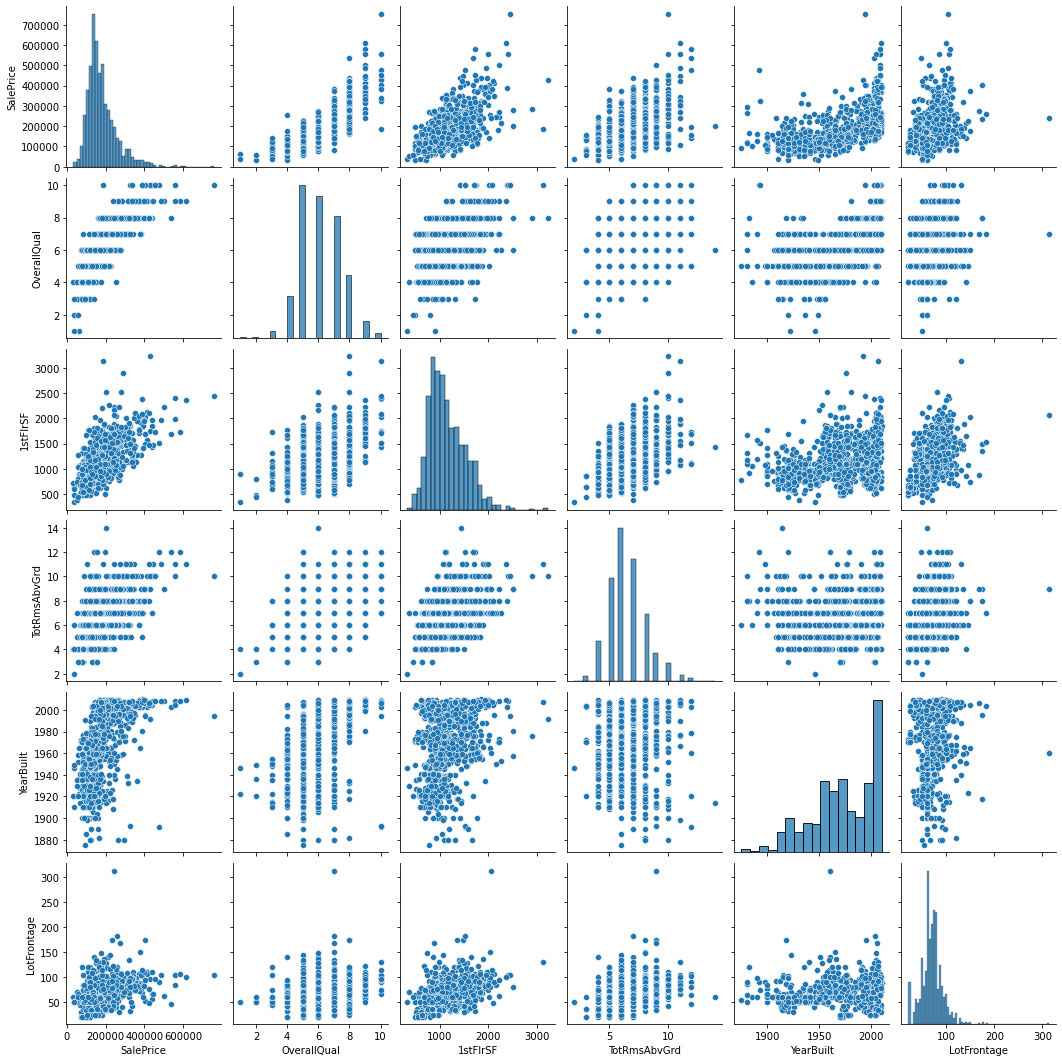

In [87]:
sns.pairplot(prueba) #identificar variables que tienen forma de regresion lineal